In [1]:
# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys( )

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Display the row's columns and data in measurement table
first_row = session.query(measurement).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1dd2e5e2040>,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

In [11]:
# Find last date rain measure was taken
# Calculate the date 1 year ago from the last data point in the database
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [12]:
# Count measurement entries was taken
session.query(measurement).count()

19550

In [13]:
# Design a query to retrieve the last 12 months (from 8-23-16 to 8-23-17) of precipitation data and plot the results 
# one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
last_12_months_rain = session.query(measurement).filter(measurement.prcp).order_by(measurement.date > '2016-08-22').count()
last_12_months_rain

9918

In [14]:
# Plot the last 12 months (from 8-23-16 to 8-23-17) of precipitation data
measure_date_prcp = session.query(measurement.date, measurement.prcp).filter(measurement.date > '2016-08-22').order_by(measurement.date).all()
#measure_date_prcp 


In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(measure_date_prcp, columns=['Date','Precipation'])

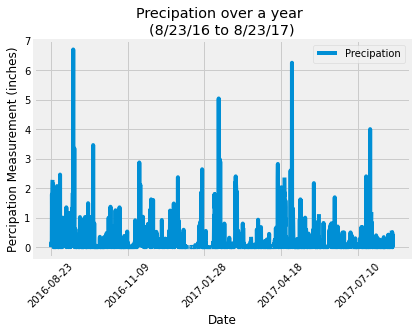

<Figure size 72000x64800 with 0 Axes>

In [16]:

# Sort the dataframe by date
# df.set_index('date', inplace=True)
df.plot(x="Date",y='Precipation')
plt.title('Precipation over a year \n(8/23/16 to 8/23/17)')
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Percipation Measurement (inches)")
# plt.tight_layout()
plt.figure(figsize=(1000,900))
plt.show()


In [17]:
# Design a query to show how many stations are available in this dataset?
session.query(measurement.station).group_by(measurement.station).count()

9

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1dd2e5e2040>,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, highest temperature recorded, and average temperature of the most active station?
my_query = session.query(measurement.station, func.count(measurement.station), measurement.date, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
my_query

[('USC00519281', 2772, '2015-09-10', 54.0, 85.0, 71.66378066378067),
 ('USC00519397', 2724, '2010-08-23', 56.0, 87.0, 74.55323054331865),
 ('USC00513117', 2709, '2014-09-14', 59.0, 85.0, 72.68918420081211),
 ('USC00519523', 2669, '2017-08-19', 56.0, 85.0, 74.5436493068565),
 ('USC00516128', 2612, '2013-10-13', 58.0, 84.0, 70.91500765696784),
 ('USC00514830', 2202, '2015-08-29', 58.0, 85.0, 74.8732970027248),
 ('USC00511918', 1979, '2010-09-19', 53.0, 87.0, 71.61596766043456),
 ('USC00517948', 1372, '2017-07-03', 58.0, 87.0, 74.68440233236151),
 ('USC00518838', 511, '2010-09-27', 58.0, 83.0, 72.72407045009784)]

In [21]:
# Station with the Highest number of measurements  
myquery = my_query[0]
myquery = myquery[0]
print (myquery)

USC00519281


In [22]:
#test query for the app.py file start date endpoint
test = session.query(measurement.date, measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date > '2016-08-22').order_by(measurement.date).all()
test

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(measurement.date, measurement.tobs).filter(measurement.station == myquery).filter(measurement.date > '2016-08-22').order_by(measurement.date).all()
# temps

In [24]:
# Save the query results as a Pandas DataFrame 
temps_df = pd.DataFrame(temps, columns=['Date','Temperatures (F)'])

temps_df.head()

,Date,Temperatures (F)
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


In [25]:
# Set Index
# df.set_index('date', inplace=True)
temps_df = temps_df.set_index('Date')
temps_df

,Temperatures (F)
Date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


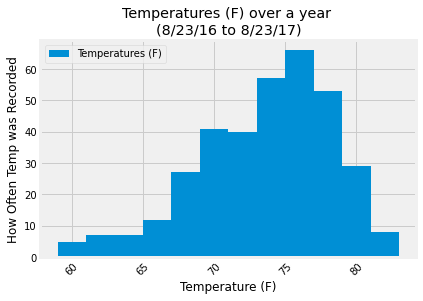

In [26]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps_df.plot.hist(bins=12)
plt.title('Temperatures (F) over a year \n(8/23/16 to 8/23/17)')
plt.xlabel('Temperature (F)')
plt.xticks(rotation=45)
plt.ylabel('How Often Temp was Recorded')
plt.show()

## Bonus Challenge Assignment

In [27]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):

    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2017-03-01', '201-03-09'))

[(None, None, None)]


In [28]:
def start_calc_temps(start_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d    
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).all()

print(start_calc_temps('2017-07-04'))

[(69.0, 78.57620817843866, 85.0)]


In [49]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temp_filter = (calc_temps('2016-08-23', '2017-08-23'))
temp_filter

[(58.0, 74.59058295964125, 87.0)]

In [50]:
y_min_error = temp_filter[0]
y_min_error = y_min_error[0]
y_min_error

58.0

In [51]:
y_max_error = temp_filter[0]
y_max_error = y_max_error[2]
y_max_error

87.0

In [52]:
error =(y_min_error,y_max_error)

In [53]:
import numpy as np
x_pos = temp_filter[0]
x_pos = x_pos[1]
y = x_pos

74.59058295964125

In [55]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots()
ax.errorbar(x=1, y, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Temperature ($\degree F^{-1}$)')
ax.set_xticks(x_pos)
ax.set_xticklabels('Travel Duration')
ax.set_title('Trip Ave Temp')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('Trip_Ave_Temp.png')
plt.show()


SyntaxError: positional argument follows keyword argument (<ipython-input-55-05d6fc517a05>, line 6)

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
